# Ks Test Sources

http://www.stats.ox.ac.uk/~massa/Lecture%2013.pdf

https://stackoverflow.com/questions/10884668/two-sample-kolmogorov-smirnov-test-in-python-scipy

https://math.stackexchange.com/questions/1251401/kolmogorov-smirnov-two-sample-test

http://www.stat.yale.edu/Courses/1997-98/101/sigtest.htm

not exactly python but helpul

https://www.graphpad.com/guides/prism/8/statistics/interpreting_results_kolmogorov-smirnov_test.htm



In [33]:
# import your standard packages
%run ../../global-tools/start.py

# import your local functions
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['savefig.dpi'] =  300

mpl.rcParams['font.serif'] = "Palatino"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = 10
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

Default libraries loaded.


In [34]:
# AS and BoB Boxes
box_bounds = [[69,79,4,20],
         [87,100,0,23]]  #lonmin,lonmax, latmin, latmax 

In [35]:
def gaus_filter_nan(img,sigma = 1):
    # import required packages
    from astropy.convolution import convolve
    from astropy.convolution import Gaussian2DKernel
    
    # create a kernal with std = 1
    kernel = Gaussian2DKernel(x_stddev=1)
    
    #convolve that with the 2d matrix
    img_conv = convolve(img, kernel)

    # set original nan points back to nans
    img_conv[np.isnan(img)] = np.nan

    return img_conv

def IOD_year_group(invar,inlat,inlon,intime,begin,end,IODyears):
    data= []
    lat = []
    lon = []
    time = []
    
    for ii,year in enumerate(IODyears):
        start_time = str(year) + begin
        end_time = str(year+1) + end
        time_slice = slice(start_time, end_time)
#         print(time_slice)
        data.extend(np.array(invar.sel(time=time_slice)))
        lat.extend(np.array(inlat.sel(time=time_slice)))
        lon.extend(np.array(inlon.sel(time=time_slice)))
        time.extend(np.array(intime.sel(time=time_slice)))
        
    return data,lat,lon,time

def IOD_year_group_coast(invar,inlat,inlon,intime,begin,end,IODyears):
    data= []
    lat = []
    lon = []
    time = []
    month = []
    season = []
    for ii,year in enumerate(IODyears):
        start_time = str(year) + begin
        end_time = str(year+1) + end
        time_slice = slice(start_time, end_time)
#         print(time_slice)
        data.extend(np.array(invar.sel(coast_time=time_slice)))
        lat.extend(np.array(inlat.sel(coast_time=time_slice)))
        lon.extend(np.array(inlon.sel(coast_time=time_slice)))
        time.extend(np.array(intime.sel(coast_time=time_slice)))
        t = intime.sel(coast_time=time_slice)
        month.extend(np.array(t.dt.month))
        season.extend(np.array(t.dt.season))
        
    return np.array(data),np.array(lat),np.array(lon),np.array(time),np.array(month),np.array(season)

In [36]:
# CP
path_CD = '../data/CD/'
infn_CD = 'awg_cd.nc'

ds_CD= xr.open_dataset(path_CD + infn_CD)
ds_CD

time_slice = slice('1958-06-01', '2020-05-31')
ds_CD = ds_CD.sel(coast_time = time_slice)
ds_CD

<xarray.Dataset>
Dimensions:                      (coast_time: 51659, latbins: 50, lonbins: 85, month: 306118, pres: 201, time: 306118, upper_pres: 99)
Coordinates:
    prof                         (time) int32 ...
  * time                         (time) datetime64[ns] 1827-10-30 ... 2020-02-07
  * pres                         (pres) int32 0 5 10 15 20 ... 985 990 995 1000
  * month                        (month) int64 10 5 12 2 5 2 2 ... 2 2 2 2 2 2 2
  * upper_pres                   (upper_pres) int32 10 15 20 25 ... 490 495 500
  * latbins                      (latbins) float64 -20.0 -19.0 ... 28.0 29.0
  * lonbins                      (lonbins) float64 35.0 36.0 ... 118.0 119.0
  * coast_time                   (coast_time) datetime64[ns] 1958-06-02 ... 2020-02-07
Data variables:
    lon                          (time) float32 ...
    lat                          (time) float32 ...
    temp_AWG                     (time, pres) float32 ...
    doxy_AWG                     (time, pres

In [37]:
mask = mask_coast(np.array(ds_CD.lon),np.array(ds_CD.lat),[35,120,-20,30])
mask.shape

(306118,)

In [38]:
# AS

ASind = (ds_CD.lat_coast > box_bounds[0][2]) & (ds_CD.lat_coast <box_bounds[0][3]) & (ds_CD.lon_coast < box_bounds[0][1]) & (ds_CD.lon_coast >box_bounds[0][0])

temp_AS = ds_CD.temp_50_200_ave_coast[ASind]
doxy_AS = ds_CD.doxy_50_200_ave_coast[ASind]

lat_AS = ds_CD.lat_coast[ASind]
lon_AS = ds_CD.lon_coast[ASind]
time_AS = ds_CD.coast_time[ASind]
seas_AS = time_AS.dt.season
mon_AS = time_AS.dt.month

In [39]:
# EBoB

BoBind = (ds_CD.lat_coast > box_bounds[1][2]) & (ds_CD.lat_coast <box_bounds[1][3]) & (ds_CD.lon_coast < box_bounds[1][1]) & (ds_CD.lon_coast >box_bounds[1][0])

temp_BoB = ds_CD.temp_50_200_ave_coast[BoBind]
doxy_BoB = ds_CD.doxy_50_200_ave_coast[BoBind]

lat_BoB = ds_CD.lat_coast[BoBind]
lon_BoB = ds_CD.lon_coast[BoBind]
time_BoB = ds_CD.coast_time[BoBind]
seas_BoB = time_BoB.dt.season
mon_BoB = time_BoB.dt.month

Text(0.5, 1.0, 'Profile Locations')

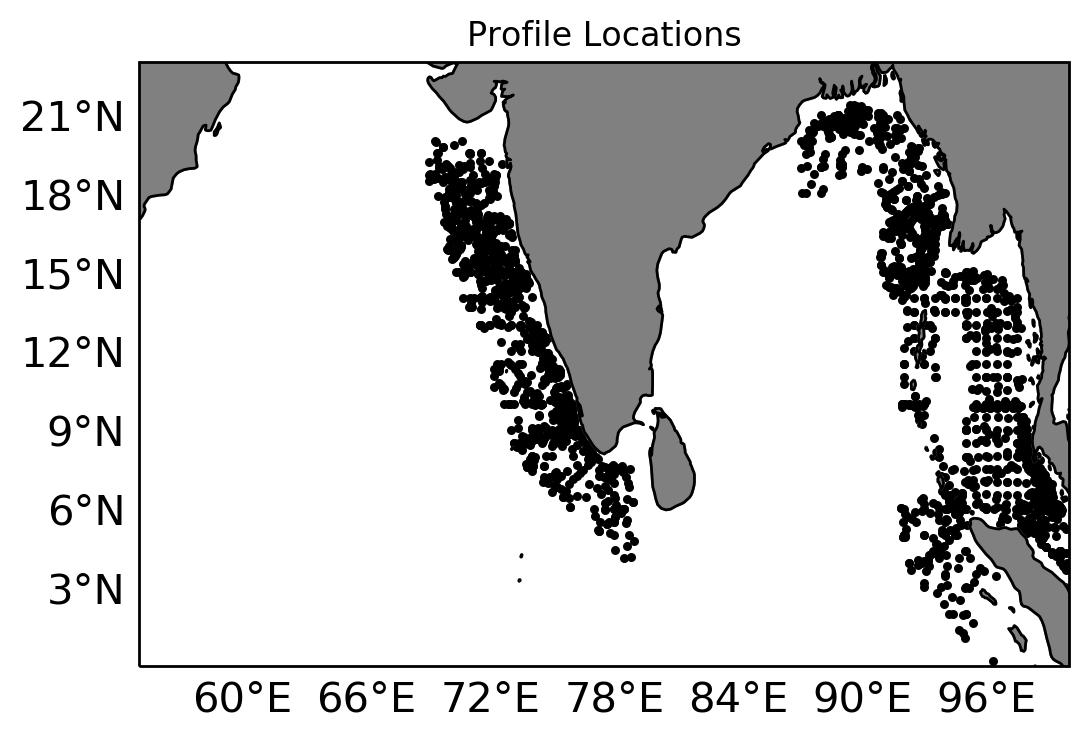

In [40]:
# make a scatter plot with rectangles to outline different locations...don't need in the figure necessairly.

    
cmin = -0.2
cmax = 0.2
levels = np.linspace(cmin, cmax, 10)

# Start figure
fig = plt.figure(figsize=(6, 4), dpi = 200)
ax = plt.axes(projection=ccrs.PlateCarree())
add_land(ax, [55,100,0,23])
p =plt.scatter(lon_AS[~np.isnan(doxy_AS)],lat_AS[~np.isnan(doxy_AS)],
            s = 20,c='k',marker = '.')
p =plt.scatter(lon_BoB[~np.isnan(doxy_BoB)],lat_BoB[~np.isnan(doxy_BoB)],
            s = 20,c='k',marker = '.')
plt.title('Profile Locations')

In [41]:
# group AS into IOD years

# load DMI data
ds_DMI= xr.open_dataset('../data/DMI/dmi_processed.nc')
ds_DMI

posIODyears = list(np.array(ds_DMI.pos_IOD_years))
negIODyears = list(np.array(ds_DMI.neg_IOD_years))
neuIODyears = list(np.array(ds_DMI.neu_IOD_years)) 

# groupd into IOD years

IODyear_begin = '-06-01' # month-day of IOD year
IODyear_end = '-05-31' # month-day of year AFTER IOD year

In [42]:
# Arabian Sea

####################################
# average over the positive IOD years -------------------------------------------# 
posIODdata_AS,posIODlat_AS,posIODlon_AS,posIODtime_AS,posIODmon_AS,posIODseas_AS = IOD_year_group_coast(doxy_AS,
                                             lat_AS,lon_AS,time_AS,
                                             IODyear_begin,IODyear_end,posIODyears)

# average over the positive IOD years -------------------------------------------# 
negIODdata_AS,negIODlat_AS,negIODlon_AS,negIODtime_AS,negIODmon_AS,negIODseas_AS= IOD_year_group_coast(doxy_AS,
                                             lat_AS,lon_AS,time_AS,
                                             IODyear_begin,IODyear_end,negIODyears)



# average over the positive IOD years -------------------------------------------# 
neuIODdata_AS,neuIODlat_AS,neuIODlon_AS,neuIODtime_AS,neuIODmon_AS,neuIODseas_AS = IOD_year_group_coast(doxy_AS,
                                             lat_AS,lon_AS,time_AS,
                                             IODyear_begin,IODyear_end,neuIODyears)



In [43]:
# eBoB

# 10-200

####################################
# average over the positive IOD years -------------------------------------------# 
posIODdata_BoB,posIODlat_BoB,posIODlon_BoB,posIODtime_BoB,posIODmon_BoB,posIODseas_BoB = IOD_year_group_coast(doxy_BoB,
                                             lat_BoB,lon_BoB,time_BoB,
                                             IODyear_begin,IODyear_end,posIODyears)

# average over the positive IOD years -------------------------------------------# 
negIODdata_BoB,negIODlat_BoB,negIODlon_BoB,negIODtime_BoB,negIODmon_BoB,negIODseas_BoB = IOD_year_group_coast(doxy_BoB,
                                             lat_BoB,lon_BoB,time_BoB,
                                             IODyear_begin,IODyear_end,negIODyears)



# average over the positive IOD years -------------------------------------------# 
neuIODdata_BoB,neuIODlat_BoB,neuIODlon_BoB,neuIODtime_BoB,neuIODmon_BoB,neuIODseas_BoB = IOD_year_group_coast(doxy_BoB,
                                             lat_BoB,lon_BoB,time_BoB,
                                             IODyear_begin,IODyear_end,neuIODyears)



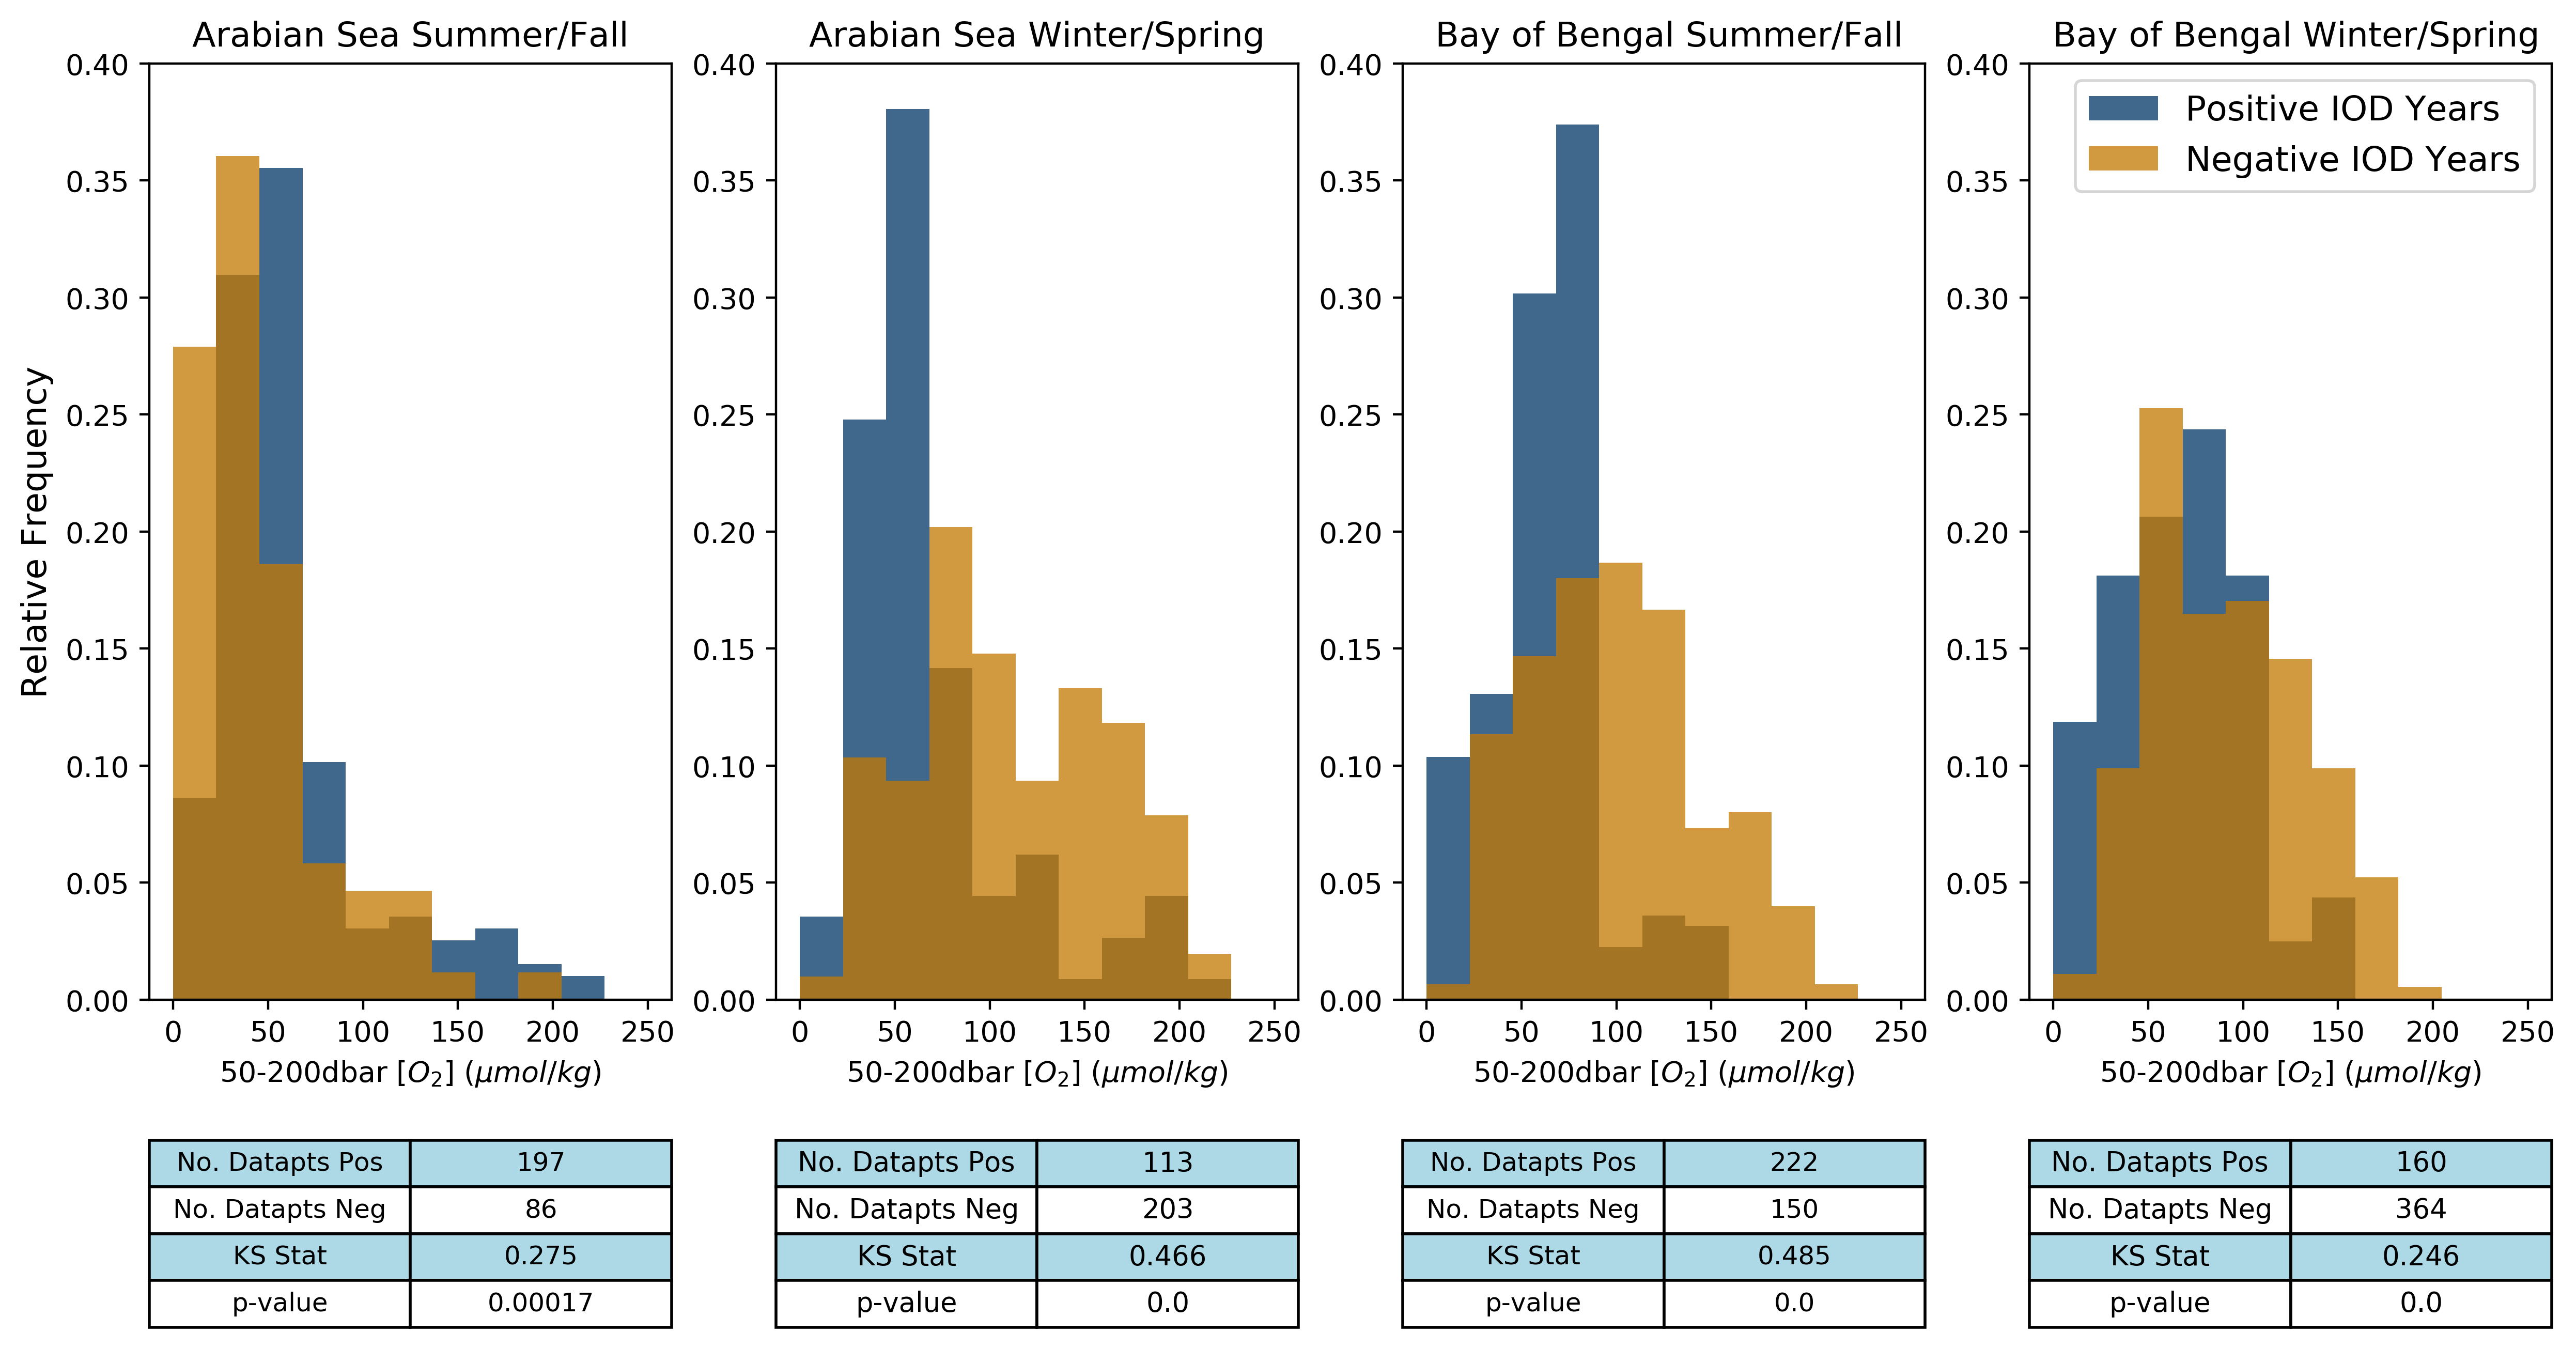

In [44]:
# Make Histograms 
binedges = np.linspace(0,250,12)
names = ['Positive IOD Years','Negative IOD Years','All Observed Years']
title = ['Arabian Sea', ' Bay of Bengal']
# colors = ['teal','orange','purple']
colors = ['#003466','#C47900']

fig = plt.figure(figsize=(15, 6), dpi=400)

#########################

data_AS = [posIODdata_AS,negIODdata_AS,doxy_AS]
data_BoB = [posIODdata_BoB,negIODdata_BoB,doxy_BoB]
time_data_AS = [posIODmon_AS,negIODmon_AS,mon_AS]
time_data_BoB = [posIODmon_BoB,negIODmon_BoB,mon_BoB]

cnt = 1
for pp in range(2):

    if pp==0:
        pdata = data_AS[pp]
        ndata = data_AS[pp+1]
        alldata = data_AS[pp+2]
        
        ptdata = time_data_AS[pp]
        ntdata = time_data_AS[pp+1]
        alltdata = time_data_AS[pp+2]
        
    else:
        pdata = data_BoB[pp-1]
        ndata = data_BoB[pp]
        alldata = data_BoB[pp+1]
        
        ptdata = time_data_BoB[pp-1]
        ntdata = time_data_BoB[pp]
        alltdata = time_data_BoB[pp+1]

    # O2
    x1 = pdata[~np.isnan(pdata)]
    x2 = ndata[~np.isnan(ndata)]
    x3 = alldata[~np.isnan(alldata)]

    x1t = ptdata[~np.isnan(pdata)]
    x2t = ntdata[~np.isnan(ndata)]
    x3t = alltdata[~np.isnan(alldata)]

    # get seasonal indicies
    ind_sf = (x1t == 6) | (x1t == 7) | (x1t == 8) | (x1t == 9) | (x1t == 10) | (x1t == 11)
    ind_ws = (x1t == 12) | (x1t == 1) | (x1t == 2) | (x1t == 3) | (x1t == 4) | (x1t ==5)

    x1_sf = x1[ind_sf]
    x1_ws = x1[ind_ws]

    ind_sf = (x2t == 6) | (x2t == 7) | (x2t == 8) | (x2t == 9) | (x2t == 10) | (x2t == 11)
    ind_ws = (x2t == 12) | (x2t == 1) | (x2t == 2) | (x2t == 3) | (x2t == 4) | (x2t ==5)

    x2_sf = x2[ind_sf]
    x2_ws = x2[ind_ws]

    ind_sf = (x3t == 6) | (x3t == 7) | (x3t == 8) | (x3t == 9) | (x3t == 10) | (x3t == 11)
    ind_ws = (x3t == 12) | (x3t == 1) | (x3t == 2) | (x3t == 3) | (x3t == 4) | (x3t ==5)

    x3_sf = x3[ind_sf]
    x3_ws = x3[ind_ws]
    

    # ks test

    pos_neg_ks_sf = stats.ks_2samp(x1_sf,x2_sf)
    pos_all_ks_sf = stats.ks_2samp(x1_sf,x3_sf)
    neg_all_ks_sf = stats.ks_2samp(x2_sf,x3_sf)

    pos_neg_ks_ws = stats.ks_2samp(x1_ws,x2_ws)
    pos_all_ks_ws = stats.ks_2samp(x1_ws,x3_ws)
    neg_all_ks_ws = stats.ks_2samp(x2_ws,x3_ws)

    # weights for relative frequency
    
    weights_sf = [np.zeros_like(x1_sf) + 1./len(x1_sf),
              np.zeros_like(x2_sf) + 1./len(x2_sf),
              np.zeros_like(x3_sf) + 1./len(x3_sf)]

    weights_ws = [np.zeros_like(x1_ws) + 1./len(x1_ws),
              np.zeros_like(x2_ws) + 1./len(x2_ws),
              np.zeros_like(x3_ws) + 1./len(x3_ws)]

    #subplot summer fall
    ax = fig.add_subplot(1,4,cnt)
#     hist_info = plt.hist([x1_sf,x2_sf,x3_sf],bins = binedges, weights=weights_sf,
#                  alpha=0.5,color = colors, label=names)
    plt.hist(x1_sf,bins = binedges, weights=weights_sf[0],
                 alpha=0.75,color = colors[0], label=names[0])
    plt.hist(x2_sf,bins = binedges, weights=weights_sf[1],
                 alpha=0.75,color = colors[1], label=names[1])
#     plt.hist(x3_sf,bins = binedges, weights=weights_sf[2],
#                  alpha=0.5,color = colors[2], label=names[2])
    ax.set_title(title[pp] + ' Winter/Spring')
    ax.set_title(title[pp] + ' Summer/Fall')
    ax.set_xlabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
    ax.set_ylim([0,0.4])
    if pp == 0:
        ax.set_ylabel('Relative Frequency', fontsize = 12)
        
    cell_text = [['No. Datapts Pos',str(len(x1_sf))],
                 ['No. Datapts Neg',str(len(x2_sf))],
                 ['KS Stat',np.round(pos_neg_ks_sf[0],3)],
                 ['p-value',np.round(pos_neg_ks_sf[1],5)]]
    
    pos = [0, -.35,  1, .2] 
    # Add a table at the bottom of the axes

    cell_colors = [['lightblue','lightblue'], ['w','w'],
             ['lightblue','lightblue'], ['w','w']]
    
    the_table = ax.table(cellText=cell_text,bbox = pos,cellColours=cell_colors,cellLoc='center')

    for (row, col), cell in the_table.get_celld().items():
        
        if (col == 1) & ((row == 4)):
            if pos_all_ks_sf[1] >= 0.05:
                cell.set_text_props(fontproperties=FontProperties(weight='bold'))
            
        if (col == 1) & ((row == 6)):
            if neg_all_ks_sf[1] >= 0.05:
                cell.set_text_props(fontproperties=FontProperties(weight='bold'))
                
#     # Adjust layout to make room for the table:
    cnt += 1
    
    # subplot winter spring
    ax = fig.add_subplot(1,4,cnt)
#     hist_info = plt.hist([x1_ws,x2_ws,x3_ws],bins = binedges, weights=weights_ws,
#                  alpha=0.5,color = colors, label=names)
    plt.hist(x1_ws,bins = binedges, weights=weights_ws[0],
                 alpha=0.75,color = colors[0], label=names[0])
    plt.hist(x2_ws,bins = binedges, weights=weights_ws[1],
                 alpha=0.75,color = colors[1], label=names[1])
#     plt.hist(x3_ws,bins = binedges, weights=weights_ws[2],
#                  alpha=0.5,color = colors[2], label=names[2])
    ax.set_title(title[pp] + ' Winter/Spring')
    ax.set_xlabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
    ax.set_ylim([0,0.4])

    cell_text = [['No. Datapts Pos',str(len(x1_ws))],
                 ['No. Datapts Neg',str(len(x2_ws))],
                 ['KS Stat',np.round(pos_neg_ks_ws[0],3)],
                 ['p-value',np.round(pos_neg_ks_ws[1],5)]]
    
    pos = [0, -.35,  1, .2] 
    # Add a table at the bottom of the axes

    cell_colors = [['lightblue','lightblue'], ['w','w'],
             ['lightblue','lightblue'], ['w','w']]
    
    the_table = ax.table(cellText=cell_text,bbox = pos,cellColours=cell_colors,cellLoc='center')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(9.5)
    
    # bold those with p values less than 0.05 confidence limit
    
    for (row, col), cell in the_table.get_celld().items():
        
        if (col == 1) & ((row == 4)):
            if pos_all_ks_ws[1] >= 0.05:
                cell.set_text_props(fontproperties=FontProperties(weight='bold'))
            
        if (col == 1) & ((row == 6)):
            if neg_all_ks_ws[1] >= 0.05:
                cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    
    if pp == 1:
        plt.legend()
        
    cnt += 1





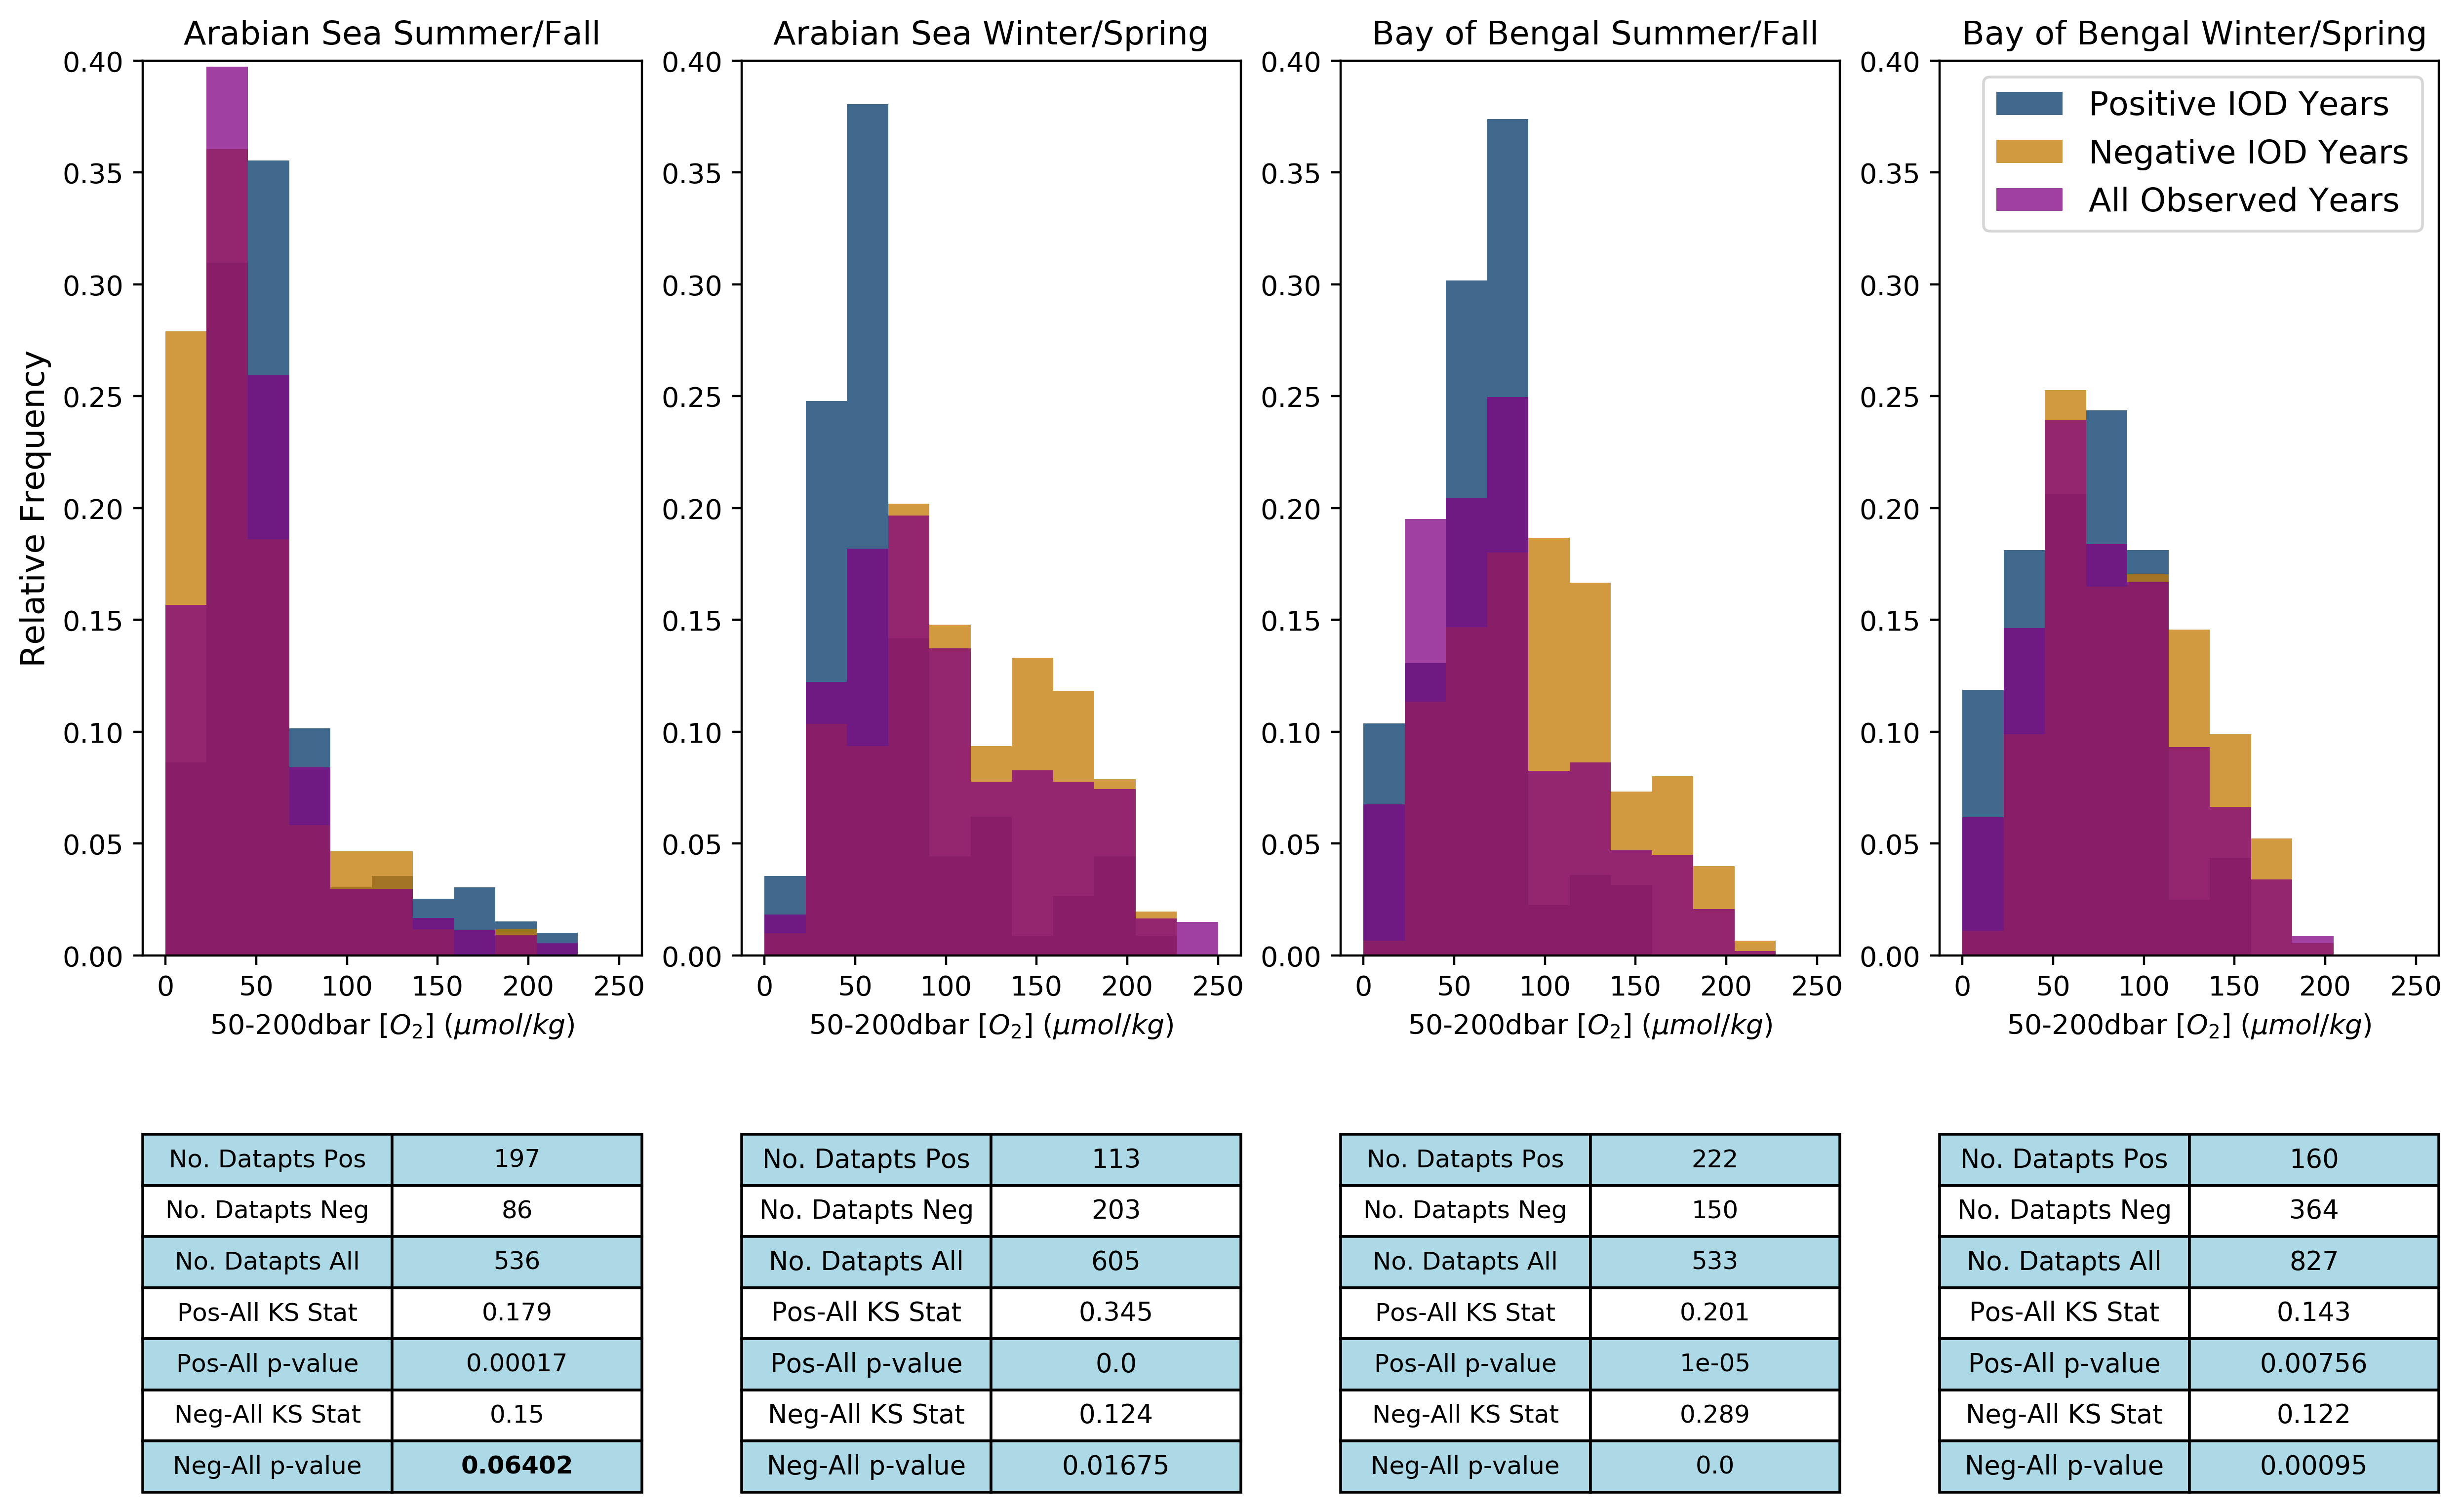

In [45]:
# Make Histograms 
binedges = np.linspace(0,250,12)
names = ['Positive IOD Years','Negative IOD Years','All Observed Years']
title = ['Arabian Sea', ' Bay of Bengal']
colors = ['#003466','#C47900','purple']

fig = plt.figure(figsize=(15, 6), dpi=400)

#########################

data_AS = [posIODdata_AS,negIODdata_AS,doxy_AS]
data_BoB = [posIODdata_BoB,negIODdata_BoB,doxy_BoB]
time_data_AS = [posIODmon_AS,negIODmon_AS,mon_AS]
time_data_BoB = [posIODmon_BoB,negIODmon_BoB,mon_BoB]

cnt = 1
for pp in range(2):

    if pp==0:
        pdata = data_AS[pp]
        ndata = data_AS[pp+1]
        alldata = data_AS[pp+2]
        
        ptdata = time_data_AS[pp]
        ntdata = time_data_AS[pp+1]
        alltdata = time_data_AS[pp+2]
        
    else:
        pdata = data_BoB[pp-1]
        ndata = data_BoB[pp]
        alldata = data_BoB[pp+1]
        
        ptdata = time_data_BoB[pp-1]
        ntdata = time_data_BoB[pp]
        alltdata = time_data_BoB[pp+1]

    # O2
    x1 = pdata[~np.isnan(pdata)]
    x2 = ndata[~np.isnan(ndata)]
    x3 = alldata[~np.isnan(alldata)]

    x1t = ptdata[~np.isnan(pdata)]
    x2t = ntdata[~np.isnan(ndata)]
    x3t = alltdata[~np.isnan(alldata)]

    # get seasonal indicies
    ind_sf = (x1t == 6) | (x1t == 7) | (x1t == 8) | (x1t == 9) | (x1t == 10) | (x1t == 11)
    ind_ws = (x1t == 12) | (x1t == 1) | (x1t == 2) | (x1t == 3) | (x1t == 4) | (x1t ==5)

    x1_sf = x1[ind_sf]
    x1_ws = x1[ind_ws]

    ind_sf = (x2t == 6) | (x2t == 7) | (x2t == 8) | (x2t == 9) | (x2t == 10) | (x2t == 11)
    ind_ws = (x2t == 12) | (x2t == 1) | (x2t == 2) | (x2t == 3) | (x2t == 4) | (x2t ==5)

    x2_sf = x2[ind_sf]
    x2_ws = x2[ind_ws]

    ind_sf = (x3t == 6) | (x3t == 7) | (x3t == 8) | (x3t == 9) | (x3t == 10) | (x3t == 11)
    ind_ws = (x3t == 12) | (x3t == 1) | (x3t == 2) | (x3t == 3) | (x3t == 4) | (x3t ==5)

    x3_sf = x3[ind_sf]
    x3_ws = x3[ind_ws]
    

    # ks test

    pos_neg_ks_sf = stats.ks_2samp(x1_sf,x2_sf)
    pos_all_ks_sf = stats.ks_2samp(x1_sf,x3_sf)
    neg_all_ks_sf = stats.ks_2samp(x2_sf,x3_sf)

    pos_neg_ks_ws = stats.ks_2samp(x1_ws,x2_ws)
    pos_all_ks_ws = stats.ks_2samp(x1_ws,x3_ws)
    neg_all_ks_ws = stats.ks_2samp(x2_ws,x3_ws)

    # weights for relative frequency
    
    weights_sf = [np.zeros_like(x1_sf) + 1./len(x1_sf),
              np.zeros_like(x2_sf) + 1./len(x2_sf),
              np.zeros_like(x3_sf) + 1./len(x3_sf)]

    weights_ws = [np.zeros_like(x1_ws) + 1./len(x1_ws),
              np.zeros_like(x2_ws) + 1./len(x2_ws),
              np.zeros_like(x3_ws) + 1./len(x3_ws)]

    #subplot summer fall
    ax = fig.add_subplot(1,4,cnt)
    plt.hist(x1_sf,bins = binedges, weights=weights_sf[0],
                 alpha=0.75,color = colors[0], label=names[0])
    plt.hist(x2_sf,bins = binedges, weights=weights_sf[1],
                 alpha=0.75,color = colors[1], label=names[1])
    plt.hist(x3_sf,bins = binedges, weights=weights_sf[2],
                 alpha=0.75,color = colors[2], label=names[2])
    ax.set_title(title[pp] + ' Winter/Spring')
    ax.set_title(title[pp] + ' Summer/Fall')
    ax.set_xlabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
    ax.set_ylim([0,0.4])
    if pp == 0:
        ax.set_ylabel('Relative Frequency', fontsize = 12)
        
    cell_text = [['No. Datapts Pos',str(len(x1_sf))],['No. Datapts Neg',str(len(x2_sf))],
                 ['No. Datapts All',str(len(x3_sf))],
                 ['Pos-All KS Stat',np.round(pos_all_ks_sf[0],3)],
                 ['Pos-All p-value',np.round(pos_all_ks_sf[1],5)],
                 ['Neg-All KS Stat',np.round(neg_all_ks_sf[0],3)],
                 ['Neg-All p-value',np.round(neg_all_ks_sf[1],5)]]
    
    pos = [0, -.6,  1, .4] 
    # Add a table at the bottom of the axes

    cell_colors = [['lightblue','lightblue'], ['w','w'],
             ['lightblue','lightblue'], ['w','w'],
             ['lightblue','lightblue'], ['w','w'],
             ['lightblue','lightblue']]
    
    the_table = ax.table(cellText=cell_text,bbox = pos,cellColours=cell_colors,cellLoc='center')

    for (row, col), cell in the_table.get_celld().items():
        
        if (col == 1) & ((row == 4)):
            if pos_all_ks_sf[1] >= 0.05:
                cell.set_text_props(fontproperties=FontProperties(weight='bold'))
            
        if (col == 1) & ((row == 6)):
            if neg_all_ks_sf[1] >= 0.05:
                cell.set_text_props(fontproperties=FontProperties(weight='bold'))
                
#     # Adjust layout to make room for the table:
    cnt += 1
    
    # subplot winter spring
    ax = fig.add_subplot(1,4,cnt)
    plt.hist(x1_ws,bins = binedges, weights=weights_ws[0],
                 alpha=0.75,color = colors[0], label=names[0])
    plt.hist(x2_ws,bins = binedges, weights=weights_ws[1],
                 alpha=0.75,color = colors[1], label=names[1])
    plt.hist(x3_ws,bins = binedges, weights=weights_ws[2],
                 alpha=0.75,color = colors[2], label=names[2])
    ax.set_title(title[pp] + ' Winter/Spring')
    ax.set_xlabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
    ax.set_ylim([0,0.4])

    cell_text = [['No. Datapts Pos',str(len(x1_ws))],
                 ['No. Datapts Neg',str(len(x2_ws))],
                 ['No. Datapts All',str(len(x3_ws))],
                 ['Pos-All KS Stat',np.round(pos_all_ks_ws[0],3)],
                 ['Pos-All p-value',np.round(pos_all_ks_ws[1],5)],
                 ['Neg-All KS Stat',np.round(neg_all_ks_ws[0],3)],
                 ['Neg-All p-value',np.round(neg_all_ks_ws[1],5)]]
    
    pos = [0, -.6,  1, .4] 
    # Add a table at the bottom of the axes

    cell_colors = [['lightblue','lightblue'], ['w','w'],
             ['lightblue','lightblue'], ['w','w'],
             ['lightblue','lightblue'], ['w','w'],
             ['lightblue','lightblue']]
    
    the_table = ax.table(cellText=cell_text,bbox = pos,cellColours=cell_colors,cellLoc='center')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(9.5)
    
    # bold those with p values less than 0.05 confidence limit
    
    for (row, col), cell in the_table.get_celld().items():
        
        if (col == 1) & ((row == 4)):
            if pos_all_ks_ws[1] >= 0.05:
                cell.set_text_props(fontproperties=FontProperties(weight='bold'))
            
        if (col == 1) & ((row == 6)):
            if neg_all_ks_ws[1] >= 0.05:
                cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    
    if pp == 1:
        plt.legend()
        
    cnt += 1




In [46]:
# tot_IOD = np.hstack((posIODdata_AS,negIODdata_AS,neuIODdata_AS))
# tot_IOD = tot_IOD[~np.isnan(tot_IOD)]
# tot_doxy = doxy_AS[~np.isnan(doxy_AS)]

# diff = np.setdiff1d(tot_doxy,tot_IOD)

# ind = tot_doxy == diff
# ind

In [47]:
# # Make Histograms 
# binedges = np.linspace(0,250,12)
# names = ['Positive IOD Years','Negative IOD Years','All Observed Years']
# title = ['Arabian Sea', ' Bay of Bengal']
# colors = ['teal','orange','purple']

# fig = plt.figure(figsize=(15, 6), dpi=400)

# #########################

# data_AS = [posIODdata_AS,negIODdata_AS,doxy_AS]
# data_BoB = [posIODdata_BoB,negIODdata_BoB,doxy_BoB]
# time_data_AS = [posIODmon_AS,negIODmon_AS,mon_AS]
# time_data_BoB = [posIODmon_BoB,negIODmon_BoB,mon_BoB]

# cnt = 1
# for pp in range(2):

#     if pp==0:
#         pdata = data_AS[pp]
#         ndata = data_AS[pp+1]
#         alldata = data_AS[pp+2]
        
#         ptdata = time_data_AS[pp]
#         ntdata = time_data_AS[pp+1]
#         alltdata = time_data_AS[pp+2]
        
#     else:
#         pdata = data_BoB[pp-1]
#         ndata = data_BoB[pp]
#         alldata = data_BoB[pp+1]
        
#         ptdata = time_data_BoB[pp-1]
#         ntdata = time_data_BoB[pp]
#         alltdata = time_data_BoB[pp+1]

#     # O2
#     x1 = pdata[~np.isnan(pdata)]
#     x2 = ndata[~np.isnan(ndata)]
#     x3 = alldata[~np.isnan(alldata)]

#     x1t = ptdata[~np.isnan(pdata)]
#     x2t = ntdata[~np.isnan(ndata)]
#     x3t = alltdata[~np.isnan(alldata)]

#     ind_sf = (x1t == 6) | (x1t == 7) | (x1t == 8) | (x1t == 9) | (x1t == 10) | (x1t == 11)
#     ind_ws = (x1t == 12) | (x1t == 1) | (x1t == 2) | (x1t == 3) | (x1t == 4) | (x1t ==5)

#     x1_sf = x1[ind_sf]
#     x1_ws = x1[ind_ws]

#     ind_sf = (x2t == 6) | (x2t == 7) | (x2t == 8) | (x2t == 9) | (x2t == 10) | (x2t == 11)
#     ind_ws = (x2t == 12) | (x2t == 1) | (x2t == 2) | (x2t == 3) | (x2t == 4) | (x2t ==5)

#     x2_sf = x2[ind_sf]
#     x2_ws = x2[ind_ws]

#     ind_sf = (x3t == 6) | (x3t == 7) | (x3t == 8) | (x3t == 9) | (x3t == 10) | (x3t == 11)
#     ind_ws = (x3t == 12) | (x3t == 1) | (x3t == 2) | (x3t == 3) | (x3t == 4) | (x3t ==5)

#     x3_sf = x3[ind_sf]
#     x3_ws = x3[ind_ws]
    

#     # ks test

#     pos_neg_ks_sf = stats.ks_2samp(x1_sf,x2_sf)
#     pos_all_ks_sf = stats.ks_2samp(x1_sf,x3_sf)
#     neg_all_ks_sf = stats.ks_2samp(x2_sf,x3_sf)

#     pos_neg_ks_ws = stats.ks_2samp(x1_ws,x2_ws)
#     pos_all_ks_ws = stats.ks_2samp(x1_ws,x3_ws)
#     neg_all_ks_ws = stats.ks_2samp(x2_ws,x3_ws)

#     # weights for relative frequency
    
#     weights_sf = [np.zeros_like(x1_sf) + 1./len(x1_sf),
#               np.zeros_like(x2_sf) + 1./len(x2_sf),
#               np.zeros_like(x3_sf) + 1./len(x3_sf)]

#     weights_ws = [np.zeros_like(x1_ws) + 1./len(x1_ws),
#               np.zeros_like(x2_ws) + 1./len(x2_ws),
#               np.zeros_like(x3_ws) + 1./len(x3_ws)]

#     #subplot summer fall
#     ax = fig.add_subplot(1,4,cnt)
#     hist_info = plt.hist([x1_sf,x2_sf,x3_sf],bins = binedges, weights=weights_sf,
#                  color = colors, label=names)
#     ax.set_title(title[pp] + ' Summer/Fall')
#     ax.set_xlabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
#     ax.set_ylim([0,0.4])
#     if pp == 0:
#         ax.set_ylabel('Relative Frequency', fontsize = 12)
        
#     cell_text = [['No. Datapts Pos',str(len(x1_sf))],['No. Datapts Neg',str(len(x2_sf))],
#                  ['No. Datapts All',str(len(x3_sf))],
#                  ['Pos-All KS Stat',np.round(pos_all_ks_sf[0],3)],
#                  ['Pos-All p-value',np.round(pos_all_ks_sf[1],3)],
#                  ['Neg-All KS Stat',np.round(neg_all_ks_sf[0],3)],
#                  ['Neg-All p-value',np.round(neg_all_ks_sf[1],3)]]
    
#     pos = [0, -.6,  1, .4] 
#     # Add a table at the bottom of the axes

#     cell_colors = [['lightblue','lightblue'], ['w','w'],
#              ['lightblue','lightblue'], ['w','w'],
#              ['lightblue','lightblue'], ['w','w'],
#              ['lightblue','lightblue']]
    
#     the_table = ax.table(cellText=cell_text,bbox = pos,cellColours=cell_colors,cellLoc='center')

#     for (row, col), cell in the_table.get_celld().items():
        
#         if (col == 1) & ((row == 4)):
#             if pos_all_ks_sf[1] >= 0.05:
#                 cell.set_text_props(fontproperties=FontProperties(weight='bold'))
            
#         if (col == 1) & ((row == 6)):
#             if neg_all_ks_sf[1] >= 0.05:
#                 cell.set_text_props(fontproperties=FontProperties(weight='bold'))
                
# #     # Adjust layout to make room for the table:
#     cnt += 1
    
#     # subplot winter spring
#     ax = fig.add_subplot(1,4,cnt)
#     hist_info = plt.hist([x1_ws,x2_ws,x3_ws],bins = binedges, weights=weights_ws,
#                  color = colors, label=names)
#     ax.set_title(title[pp] + ' Winter/Spring')
#     ax.set_xlabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
#     ax.set_ylim([0,0.4])

#     cell_text = [['No. Datapts Pos',str(len(x1_ws))],
#                  ['No. Datapts Neg',str(len(x2_ws))],
#                  ['No. Datapts All',str(len(x3_ws))],
#                  ['Pos-All KS Stat',np.round(pos_all_ks_ws[0],3)],
#                  ['Pos-All p-value',np.round(pos_all_ks_ws[1],3)],
#                  ['Neg-All KS Stat',np.round(neg_all_ks_ws[0],3)],
#                  ['Neg-All p-value',np.round(neg_all_ks_ws[1],3)]]
    
#     pos = [0, -.6,  1, .4] 
#     # Add a table at the bottom of the axes

#     cell_colors = [['lightblue','lightblue'], ['w','w'],
#              ['lightblue','lightblue'], ['w','w'],
#              ['lightblue','lightblue'], ['w','w'],
#              ['lightblue','lightblue']]
    
#     the_table = ax.table(cellText=cell_text,bbox = pos,cellColours=cell_colors,cellLoc='center')
#     the_table.auto_set_font_size(False)
#     the_table.set_fontsize(9.5)
    
#     # bold those with p values less than 0.05 confidence limit
    
#     for (row, col), cell in the_table.get_celld().items():
        
#         if (col == 1) & ((row == 4)):
#             if pos_all_ks_ws[1] >= 0.05:
#                 cell.set_text_props(fontproperties=FontProperties(weight='bold'))
            
#         if (col == 1) & ((row == 6)):
#             if neg_all_ks_ws[1] >= 0.05:
#                 cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    
#     if pp == 1:
#         plt.legend()
        
#     cnt += 1



In [48]:
# # Make Histograms 
# binedges = np.linspace(0,250,12)
# names = ['Positive IOD Years','Negative IOD Years','All Observed Years']
# title = ['Arabian Sea', ' Bay of Bengal']
# colors = ['teal','orange','purple']

# fig = plt.figure(figsize=(15, 6), dpi=400)

# #########################

# data_AS = [posIODdata_AS,negIODdata_AS,neuIODdata_AS]
# data_BoB = [posIODdata_BoB,negIODdata_BoB,neuIODdata_BoB]
# time_data_AS = [posIODmon_AS,negIODmon_AS,neuIODmon_AS]
# time_data_BoB = [posIODmon_BoB,negIODmon_BoB,neuIODmon_BoB]

# cnt = 1
# for pp in range(2):

#     if pp==0:
#         pdata = data_AS[pp]
#         ndata = data_AS[pp+1]
#         nudata = data_AS[pp+2]
        
#         ptdata = time_data_AS[pp]
#         ntdata = time_data_AS[pp+1]
#         nutdata = time_data_AS[pp+2]
        
#     else:
#         pdata = data_BoB[pp-1]
#         ndata = data_BoB[pp]
#         nudata = data_BoB[pp+1]
        
#         ptdata = time_data_BoB[pp-1]
#         ntdata = time_data_BoB[pp]
#         nutdata = time_data_BoB[pp+1]

#     # O2
#     x1 = pdata[~np.isnan(pdata)]
#     x2 = ndata[~np.isnan(ndata)]
#     x3 = nudata[~np.isnan(nudata)]

#     x1t = ptdata[~np.isnan(pdata)]
#     x2t = ntdata[~np.isnan(ndata)]
#     x3t = nutdata[~np.isnan(nudata)]

#     ind_sf = (x1t == 6) | (x1t == 7) | (x1t == 8) | (x1t == 9) | (x1t == 10) | (x1t == 11)
#     ind_ws = (x1t == 12) | (x1t == 1) | (x1t == 2) | (x1t == 3) | (x1t == 4) | (x1t ==5)

#     x1_sf = x1[ind_sf]
#     x1_ws = x1[ind_ws]

#     ind_sf = (x2t == 6) | (x2t == 7) | (x2t == 8) | (x2t == 9) | (x2t == 10) | (x2t == 11)
#     ind_ws = (x2t == 12) | (x2t == 1) | (x2t == 2) | (x2t == 3) | (x2t == 4) | (x2t ==5)

#     x2_sf = x2[ind_sf]
#     x2_ws = x2[ind_ws]

#     ind_sf = (x3t == 6) | (x3t == 7) | (x3t == 8) | (x3t == 9) | (x3t == 10) | (x3t == 11)
#     ind_ws = (x3t == 12) | (x3t == 1) | (x3t == 2) | (x3t == 3) | (x3t == 4) | (x3t ==5)

#     x3_sf = x3[ind_sf]
#     x3_ws = x3[ind_ws]
#     x3_sf = np.hstack((x1_sf,x2_sf,x3_sf))
#     x3_ws = np.hstack((x1_ws,x2_ws,x3_ws))

#     # ks test

#     pos_neg_ks_sf = stats.ks_2samp(x1_sf,x2_sf)
#     pos_all_ks_sf = stats.ks_2samp(x1_sf,x3_sf)
#     neg_all_ks_sf = stats.ks_2samp(x2_sf,x3_sf)

#     pos_neg_ks_ws = stats.ks_2samp(x1_ws,x2_ws)
#     pos_all_ks_ws = stats.ks_2samp(x1_ws,x3_ws)
#     neg_all_ks_ws = stats.ks_2samp(x2_ws,x3_ws)

#     # weights for relative frequency
    
#     weights_sf = [np.zeros_like(x1_sf) + 1./len(x1_sf),
#               np.zeros_like(x2_sf) + 1./len(x2_sf),
#               np.zeros_like(x3_sf) + 1./len(x3_sf)]

#     weights_ws = [np.zeros_like(x1_ws) + 1./len(x1_ws),
#               np.zeros_like(x2_ws) + 1./len(x2_ws),
#               np.zeros_like(x3_ws) + 1./len(x3_ws)]

#     #subplot summer fall
#     ax = fig.add_subplot(1,4,cnt)
#     hist_info = plt.hist([x1_sf,x2_sf,x3_sf],bins = binedges, weights=weights_sf,
#                  color = colors, label=names)
#     ax.set_title(title[pp] + ' Summer/Fall')
#     ax.set_xlabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
#     ax.set_ylim([0,0.4])
#     if pp == 0:
#         ax.set_ylabel('Relative Frequency', fontsize = 12)
        
#     cell_text = [['No. Datapts Pos',str(len(x1_sf))],['No. Datapts Neg',str(len(x2_sf))],
#                  ['No. Datapts All',str(len(x3_sf))],
#                  ['Pos-All KS Stat',np.round(pos_all_ks_sf[0],3)],
#                  ['Pos-All p-value',np.round(pos_all_ks_sf[1],3)],
#                  ['Neg-All KS Stat',np.round(neg_all_ks_sf[0],3)],
#                  ['Neg-All p-value',np.round(neg_all_ks_sf[1],3)]]
    
#     pos = [0, -.6,  1, .4] 
#     # Add a table at the bottom of the axes

#     cell_colors = [['lightblue','lightblue'], ['w','w'],
#              ['lightblue','lightblue'], ['w','w'],
#              ['lightblue','lightblue'], ['w','w'],
#              ['lightblue','lightblue']]
    
#     the_table = ax.table(cellText=cell_text,bbox = pos,cellColours=cell_colors,cellLoc='center')

#     for (row, col), cell in the_table.get_celld().items():
        
#         if (col == 1) & ((row == 4)):
#             if pos_all_ks_sf[1] >= 0.05:
#                 cell.set_text_props(fontproperties=FontProperties(weight='bold'))
            
#         if (col == 1) & ((row == 6)):
#             if neg_all_ks_sf[1] >= 0.05:
#                 cell.set_text_props(fontproperties=FontProperties(weight='bold'))
                
# #     # Adjust layout to make room for the table:
#     cnt += 1
    
#     # subplot winter spring
#     ax = fig.add_subplot(1,4,cnt)
#     hist_info = plt.hist([x1_ws,x2_ws,x3_ws],bins = binedges, weights=weights_ws,
#                  color = colors, label=names)
#     ax.set_title(title[pp] + ' Winter/Spring')
#     ax.set_xlabel('50-200dbar [$O_2$] ($\mu mol/ kg$)')
#     ax.set_ylim([0,0.4])

#     cell_text = [['No. Datapts Pos',str(len(x1_ws))],
#                  ['No. Datapts Neg',str(len(x2_ws))],
#                  ['No. Datapts All',str(len(x3_ws))],
#                  ['Pos-All KS Stat',np.round(pos_all_ks_ws[0],3)],
#                  ['Pos-All p-value',np.round(pos_all_ks_ws[1],3)],
#                  ['Neg-All KS Stat',np.round(neg_all_ks_ws[0],3)],
#                  ['Neg-All p-value',np.round(neg_all_ks_ws[1],3)]]
    
#     pos = [0, -.6,  1, .4] 
#     # Add a table at the bottom of the axes

#     cell_colors = [['lightblue','lightblue'], ['w','w'],
#              ['lightblue','lightblue'], ['w','w'],
#              ['lightblue','lightblue'], ['w','w'],
#              ['lightblue','lightblue']]
    
#     the_table = ax.table(cellText=cell_text,bbox = pos,cellColours=cell_colors,cellLoc='center')
#     the_table.auto_set_font_size(False)
#     the_table.set_fontsize(9.5)
    
#     # bold those with p values less than 0.05 confidence limit
    
#     for (row, col), cell in the_table.get_celld().items():
        
#         if (col == 1) & ((row == 4)):
#             if pos_all_ks_ws[1] >= 0.05:
#                 cell.set_text_props(fontproperties=FontProperties(weight='bold'))
            
#         if (col == 1) & ((row == 6)):
#             if neg_all_ks_ws[1] >= 0.05:
#                 cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    
#     if pp == 1:
#         plt.legend()
        
#     cnt += 1


